In [50]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config #file with client_id and secret for the Spotify API
import spotipy
from IPython.display import IFrame

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    kmeans = KMeans()  # Equivalent to setting n_init=10 (default)

In [51]:
#reading df with Spotify songs extracted with API (based on 1800-1900 songs)
df=pd.read_csv("https://raw.githubusercontent.com/okravtsova123/SongRecommendationML-k-means-/main/songs_with_AF.csv")
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, client_secret= config.client_secret))

In [52]:
#dropping columns for analysis
columns_to_drop=['type', 'uri', 'track_href', 'analysis_url']
X=df.drop(columns_to_drop, axis=1)
# setting indexes as IDs - convinient for scaling
X.set_index("id", inplace=True)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.647,0.582,10,-9.538,0,0.0755,0.41000,0.000002,0.0715,0.915,167.396,146480,4
40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,4
5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.02360,0.015300,0.0360,0.847,117.046,293827,4
4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,354320,4
7iN1s7xHE4ifF5povM6A48,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,243027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6s8nHXTJVqFjXE4yVZPDHR,0.762,0.863,0,-3.689,0,0.0561,0.01500,0.000000,0.1250,0.965,106.012,185587,4
5YdnOm5990Kfq1Jodws98B,0.616,0.841,5,-4.779,0,0.0760,0.05590,0.002170,0.4170,0.714,110.029,154561,4
4Tt6GiWS2V9sQjZjS2xjp2,0.754,0.802,9,-6.424,1,0.0551,0.03490,0.000000,0.3350,0.583,122.026,199263,4


In [53]:
#scaling
scaler=StandardScaler()
scaler.fit(X)
IDs=X.index
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled=X_scaled.set_index(IDs)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.253072,-0.077316,1.280852,0.121592,-1.129113,-0.046608,0.336137,-0.713205,-0.747797,1.709373,1.633885,-0.891471,0.17562
40riOy7x9W7GXjyGp4pjAv,-0.135979,-0.333894,-0.924808,0.129034,0.885651,-0.680734,-0.798658,-0.711900,-0.851412,0.532631,0.910252,1.935083,0.17562
5ChkMS8OtdzJeqyybCc9R5,1.814995,0.172327,1.556560,1.015585,-1.129113,-0.509454,-0.748523,-0.672633,-1.010536,1.447875,-0.163507,0.809187,0.17562
4u7EnebtmKWzUH433cf5Qv,-1.079998,-0.694489,-1.476223,0.067845,-1.129113,-0.381322,-0.054049,-0.713211,0.943358,-0.947911,-1.803506,1.507388,0.17562
7iN1s7xHE4ifF5povM6A48,-0.914080,-0.697956,-1.476223,0.286830,0.885651,-0.612745,0.956503,-0.713211,-0.455453,-0.232636,0.779490,0.222861,0.17562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6s8nHXTJVqFjXE4yVZPDHR,0.911025,0.896985,-1.476223,0.927660,-1.129113,-0.300258,-0.772664,-0.713211,-0.351837,1.901651,-0.557398,-0.440103,0.17562
5YdnOm5990Kfq1Jodws98B,0.075710,0.820705,-0.097686,0.777444,-1.129113,-0.040071,-0.657854,-0.707455,1.809288,0.936415,-0.413999,-0.798201,0.17562
4Tt6GiWS2V9sQjZjS2xjp2,0.865254,0.685482,1.005144,0.550742,0.885651,-0.313333,-0.716803,-0.713211,1.202397,0.432646,0.014269,-0.282257,0.17562


In [54]:
#training model for clustering
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=18, random_state=42)

In [55]:
#identifying clusters
clusters = kmeans.predict(X_scaled)
clusters_df=pd.DataFrame(clusters).value_counts().sort_index()
clusters_df

0      40
1     204
2     156
3     136
4      97
5      55
6      89
7     140
8      14
9     155
10     99
11    158
12    221
13    125
14    138
15     86
16    121
17    159
Name: count, dtype: int64

In [56]:
#checking inertia
kmeans.inertia_

11458.584156692934

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

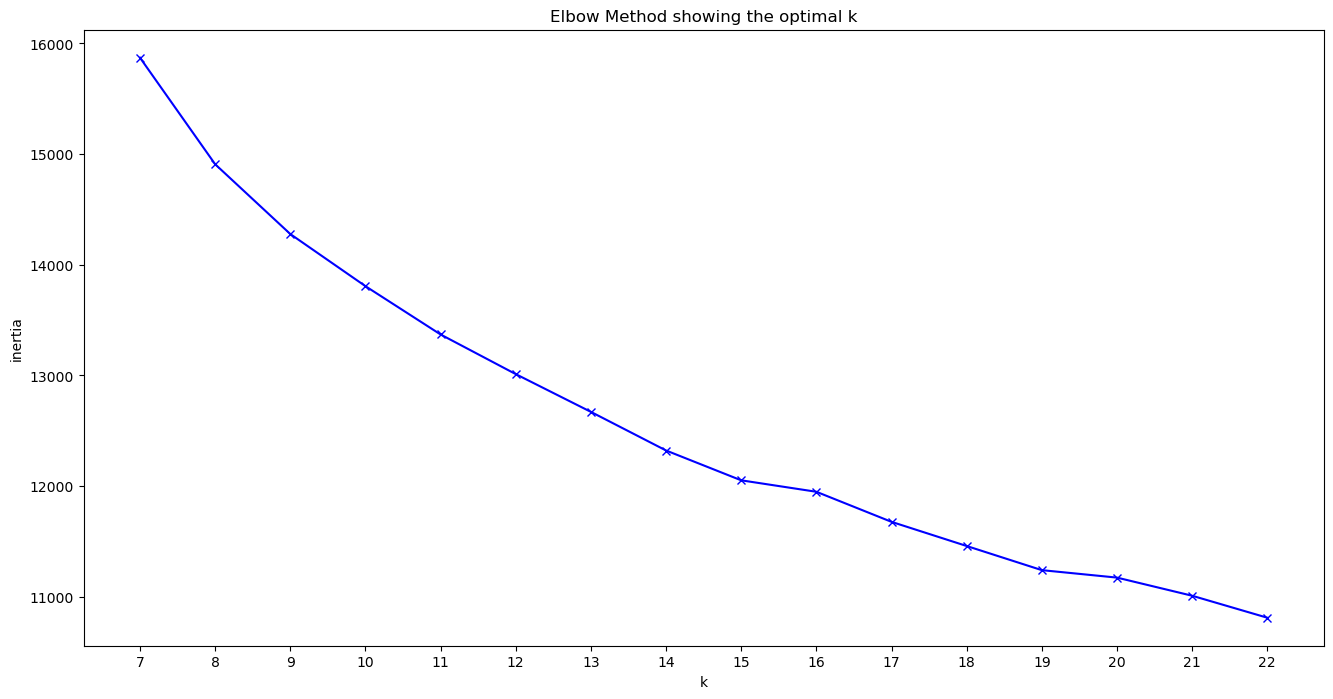

In [59]:
#choosing optimal k using lebow method
K = range(7, 23)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

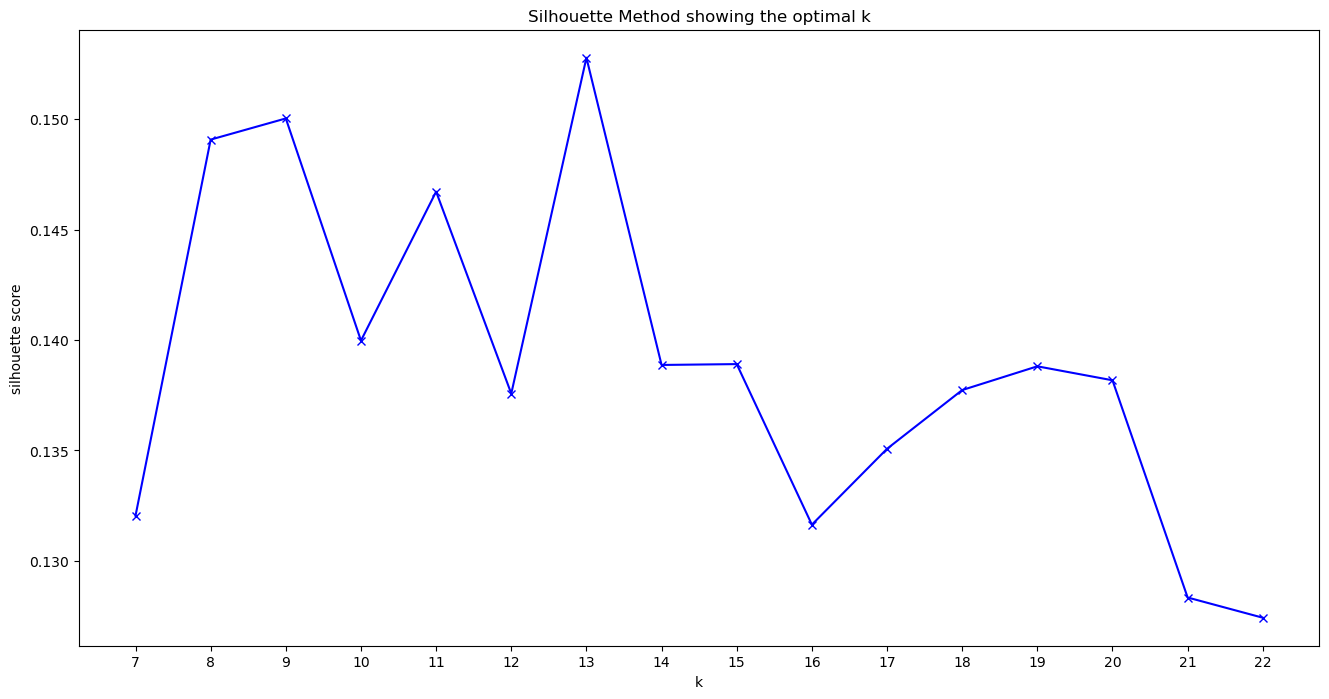

In [60]:
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [61]:
#adding clusters
clusters=kmeans.predict(X_scaled)
X_scaled_w_clusters=X_scaled
X_scaled_w_clusters['cluster']=clusters

In [62]:
#all in functions

def user_input():
    song_input=input("input your favourite song:")
    song_input=song_input.lower()
    return search_spotify(song_input)

def search_spotify(song):
    song_name=song
    result=sp.search(q=song_name,type="track",market="GB")
    song_id=result['tracks']['items'][0]['id']
    return extracting_AF(song_id)

def extracting_AF(song_id):
    song_af=pd.DataFrame(sp.audio_features(song_id))
    song_af=song_af.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
    song_af=song_af.set_index("id")
    return scaling_transform(song_af)

def scaling_transform(df):
    ids=df.index
    scaled_df=pd.DataFrame(scaler.transform(df), columns=df.columns)
    scaled_df=scaled_df.set_index(ids)
    return recomendation(scaled_df)

def recomendation(scaled_df):
    #getting the cluster
    cluster_for_rec=kmeans.predict(scaled_df)[0]
    #checking df with this cluster and extracting sample
    recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
    recomended_song_id=recomended_song.index[0]
    #playing recommended song
    recomended_song_id = str(recomended_song_id)
    return IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")

In [68]:
user_input()

input your favourite song:whenever, wherever


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
